### Random Selection

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [32]:
# Maximum clicked Ad column
dataset['Ad 5'].value_counts()

0    7305
1    2695
Name: Ad 5, dtype: int64

#### So here we have Dataset which already has data of ads clicked by our customers. But we want to predict early on which ad shall be most clicked. We want to optimize the click through rates of our customers. Does any ad is actually most liked than all the rest? As its a small dataset we can see that Ad 5 gets most clicked.
#### Now we shall consider that people clicked ads randomly and try to reward the model as it guesses correctly.

In [33]:
# Implementing Random Selection
import random
N = 10000
d = 10 
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d) # As there are 10 Ads
    ads_selected.append(ad) 
    reward = dataset.values[n, ad] # We reward it if it guesses right.
    total_reward = total_reward + reward

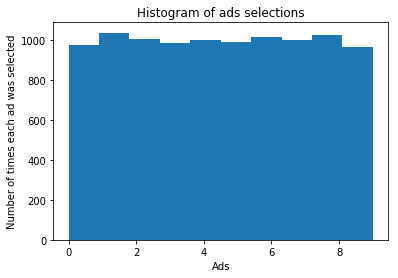

In [34]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### We can see here from histogram of Ads clicked, Randomly all ads are clicked quite uniformly. That's not a good model.

In [39]:
print('Percentage of dataset our above model guessed right', total_reward/N * 100, '%')

Percentage of dataset our above model guessed right 12.45 %


### Upper Confidence Bound

#### Now here instead of guessing randomly. We implement Upper Confidence bound algorithm to go through dataset one row at a time in three steps:
* At each round n (one row at a time),  we consider two numbers for each Ad i : Number of times the ad i was selected upto round n, sum of rewards of the ad i upto round n
* From these two numbers we compute : the average reward of ad i upto round n, upper bound of confidence interval upto round n 
* We select the Ad i that has max ucb

In [45]:
# Implementing UCB

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = np.sqrt(3/2 * np.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # For restricting the ad with highest upper bound for every round
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i # Ad with highest upper bound
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

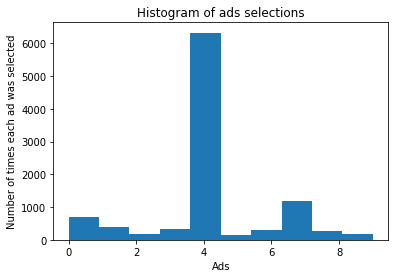

In [46]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### This doesn't shows the actual click but just a way showing convergence rate of a column, where column 5 is highest

### The strategy is used when we give 10 versions of an ad and as they get clicked we implement this UCB Algo behind it and figure out the most liked/clicked ad by customers. Thus gradually we replace 10 ads with the one most liked.
### That's Reinforcement Learning.